# ACT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('whitegrid')

## Preparing the data

In [2]:
### Import data

df_1 = pd.read_csv('data/act_2017.csv') ### ACT_2017
df_2 = pd.read_csv('data/act_2018.csv') ### ACT_2018
df_3 = pd.read_csv('data/act_2019.csv') ### ACT_2019

In [3]:
df_act_ca = pd.read_csv('data/act_2019_ca.csv')

In [4]:
df_1.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [5]:
print(df_1.isnull().sum())
print('----------------------------------')
print(df_2.isnull().sum())
print('----------------------------------')
print(df_3.isnull().sum())

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64
----------------------------------
State            0
Participation    0
Composite        0
dtype: int64
----------------------------------
State            0
Participation    0
Composite        0
dtype: int64


In [6]:
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)

(52, 7)
(52, 3)
(52, 3)


In [7]:
print(df_1.dtypes)
print('----------------------------------')
print(df_2.dtypes)
print('----------------------------------')
print(df_3.dtypes)

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object
----------------------------------
State             object
Participation     object
Composite        float64
dtype: object
----------------------------------
State             object
Participation     object
Composite        float64
dtype: object


In [8]:
df_1['Composite'].unique()

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

In [9]:
### Correct "20.2x" to float

a = []
for i in list(df_1['Composite']):
    if i == '20.2x':
        i = 20.2
        a.append(i)
    elif type(i) == str:
        a.append(float(i))
    else:
        a.append(i)

In [10]:
### Assign column 'Composite' equal to correct data

df_1['Composite'] = a

In [11]:
df_1.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [12]:
df_1.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [13]:
### Drop columns = ['English', 'Math', 'Reading', 'Science'] for analysis only Participation and Composite

df_1.drop(columns=['English', 'Math', 'Reading', 'Science'],inplace=True)

In [14]:
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)

(52, 3)
(52, 3)
(52, 3)


In [15]:
### Convert column of Percent Participation to float

df_1['Participation'] = df_1['Participation'].map(lambda x:x.split('%')[0]).astype('float')
df_2['Participation'] = df_2['Participation'].map(lambda x:x.split('%')[0]).astype('float')
df_3['Participation'] = df_3['Participation'].map(lambda x:x.split('%')[0]).astype('float')

## Merge DataFrame of 3 years

In [16]:
### Merge dataframe between 2017 & 2018

df_update = pd.merge(df_1,df_2,on='State',suffixes=['_2017','_2018'])

In [17]:
### Merge dataframe with 2019

df_act = pd.merge(df_update,df_3,on='State')

In [18]:
### Rename columns

df_act.rename(columns={'Participation':'Participation_2019','Composite':'Composite_2019'},inplace=True)

In [19]:
df_act.head()

,State,Participation_2017,Composite_2017,Participation_2018,Composite_2018,Participation_2019,Composite_2019
0,Alabama,100.0,19.2,100.0,19.1,100.0,18.9
1,Alaska,65.0,19.8,33.0,20.8,38.0,20.1
2,Arizona,62.0,19.7,66.0,19.2,73.0,19.0
3,Arkansas,100.0,19.4,100.0,19.4,100.0,19.3
4,California,31.0,22.8,27.0,22.7,23.0,22.6


In [20]:
df_act.isnull().sum()

State                 0
Participation_2017    0
Composite_2017        0
Participation_2018    0
Composite_2018        0
Participation_2019    0
Composite_2019        0
dtype: int64

In [21]:
### Rename column to lowercase

df_act.rename(columns={colname:colname.lower() for colname in df_act.columns},inplace=True)

In [22]:
df_act.head()

,state,participation_2017,composite_2017,participation_2018,composite_2018,participation_2019,composite_2019
0,Alabama,100.0,19.2,100.0,19.1,100.0,18.9
1,Alaska,65.0,19.8,33.0,20.8,38.0,20.1
2,Arizona,62.0,19.7,66.0,19.2,73.0,19.0
3,Arkansas,100.0,19.4,100.0,19.4,100.0,19.3
4,California,31.0,22.8,27.0,22.7,23.0,22.6


In [23]:
df_act.dtypes

state                  object
participation_2017    float64
composite_2017        float64
participation_2018    float64
composite_2018        float64
participation_2019    float64
composite_2019        float64
dtype: object

In [24]:
### Find %Change of participation between 2017-2019

df_act['%change'] = df_act['participation_2019'] - df_act['participation_2017']

In [25]:
### Set 'state' to index of dataframe

df_act.set_index('state',inplace=True)

In [26]:
df_act.head()

,participation_2017,composite_2017,participation_2018,composite_2018,participation_2019,composite_2019,%change
state,,,,,,,
Alabama,100.0,19.2,100.0,19.1,100.0,18.9,0.0
Alaska,65.0,19.8,33.0,20.8,38.0,20.1,-27.0
Arizona,62.0,19.7,66.0,19.2,73.0,19.0,11.0
Arkansas,100.0,19.4,100.0,19.4,100.0,19.3,0.0
California,31.0,22.8,27.0,22.7,23.0,22.6,-8.0


## Visualization

### Top10 of %Participation

In [27]:
### Find the top10 of %Participation in 2019

df_top10_participation = df_act[['participation_2019']].sort_values(by='participation_2019',ascending=False)

In [28]:
df_top10_participation.head()

,participation_2019
state,
Alabama,100.0
Kentucky,100.0
Wisconsin,100.0
Utah,100.0
Tennessee,100.0


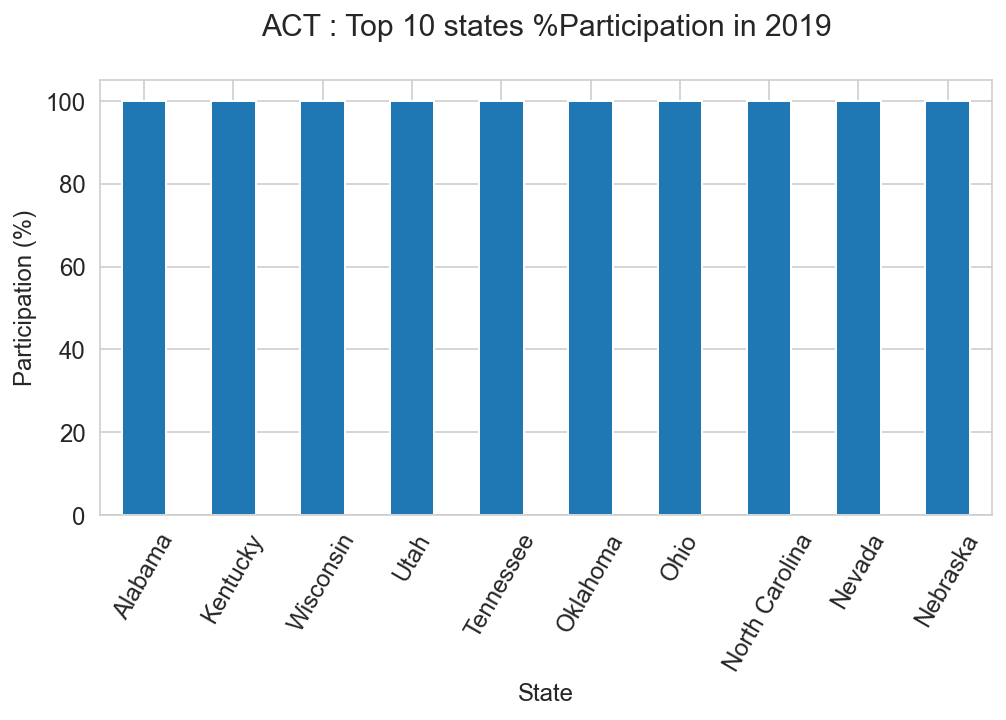

In [29]:
### Plot bar chart to visualize top10 of %Participation in 2019

df_top10_participation.iloc[:10].plot(kind='bar',figsize=(8,4),fontsize=12,legend=False)
plt.xlabel('State',fontsize=12)
plt.ylabel('Participation (%)',fontsize=12)
plt.title('ACT : Top 10 states %Participation in 2019\n',fontsize=15)
plt.xticks(rotation=60);

### Top10 of %Change

In [30]:
### Find the %Participation in 2017 for each State that is top10 of %Change between 2017-2019

df_top10_perchange_2017 = df_act[['%change','participation_2017']].sort_values(by='%change',ascending=False)

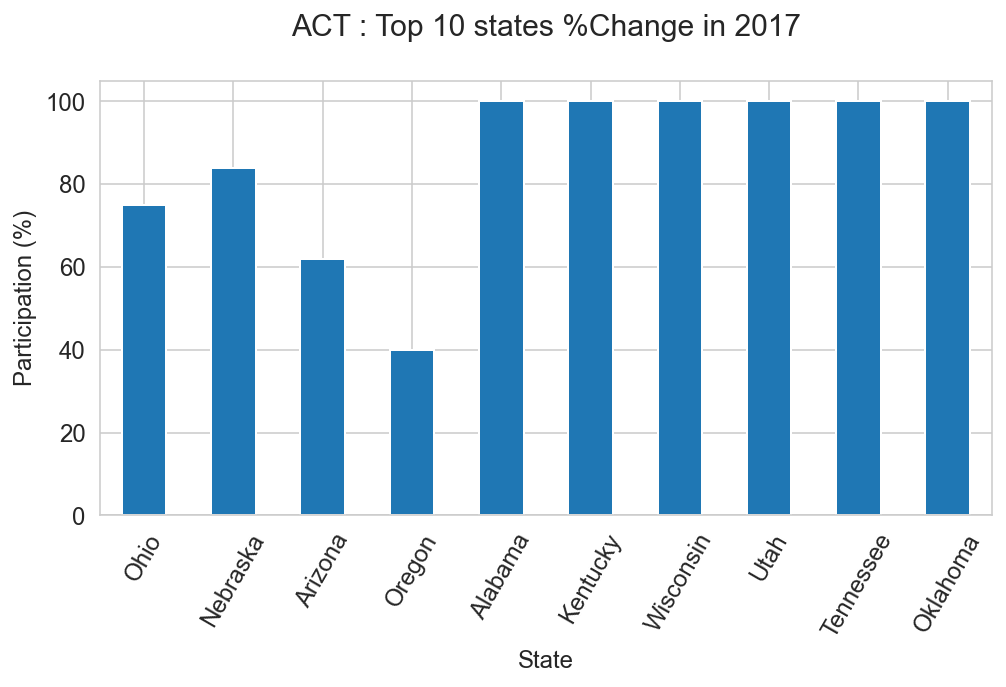

In [31]:
### Plot bar chart to visualize %Participation in 2017 for each State that is top10 of %Change between 2017-2019

df_top10_perchange_2017['participation_2017'].iloc[:10].plot(kind='bar',figsize=(8,4),fontsize=12,legend=False)
plt.xlabel('State',fontsize=12)
plt.ylabel('Participation (%)',fontsize=12)
plt.title('ACT : Top 10 states %Change in 2017\n',fontsize=15)
plt.xticks(rotation=60);

In [32]:
### Find the %Participation in 2019 for each State that is top10 of %Change between 2017-2019

df_top10_perchange_2019 = df_act[['%change','participation_2019']].sort_values(by='%change',ascending=False)

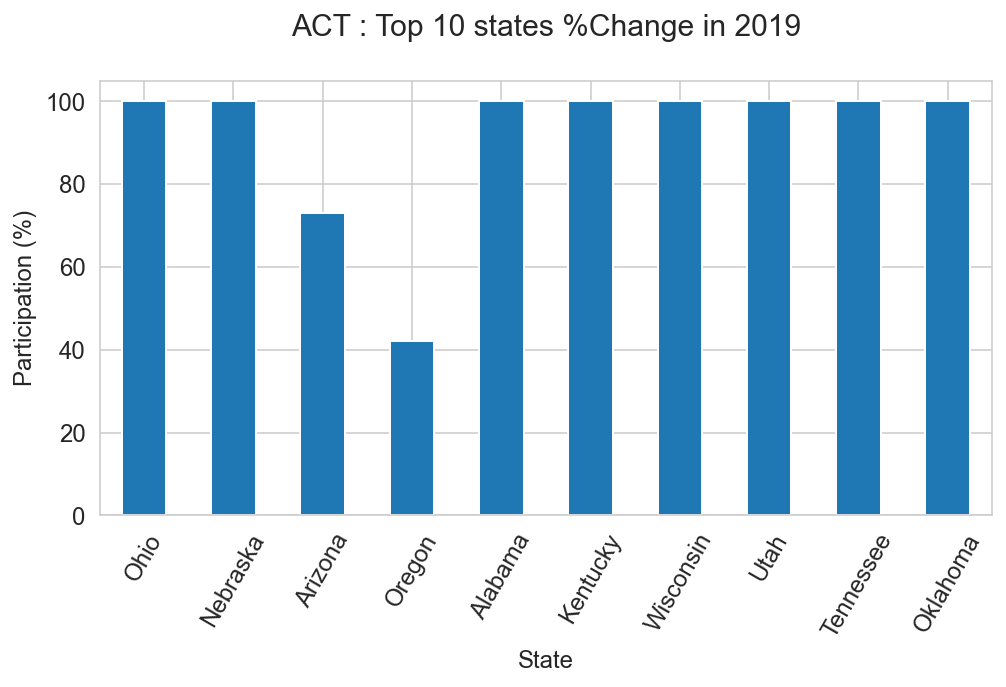

In [33]:
### Plot bar chart to visualize %Participation in 2019 for each State that is top10 of %Change between 2017-2019

df_top10_perchange_2019['participation_2019'].iloc[:10].plot(kind='bar',figsize=(8,4),fontsize=12,legend=False)
plt.xlabel('State',fontsize=12)
plt.ylabel('Participation (%)',fontsize=12)
plt.title('ACT : Top 10 states %Change in 2019\n',fontsize=15)
plt.xticks(rotation=60);

In [34]:
### Find the top10 of %Change between 2017-2019

df_top10_perchange = df_act[['%change']].sort_values(by='%change',ascending=False)

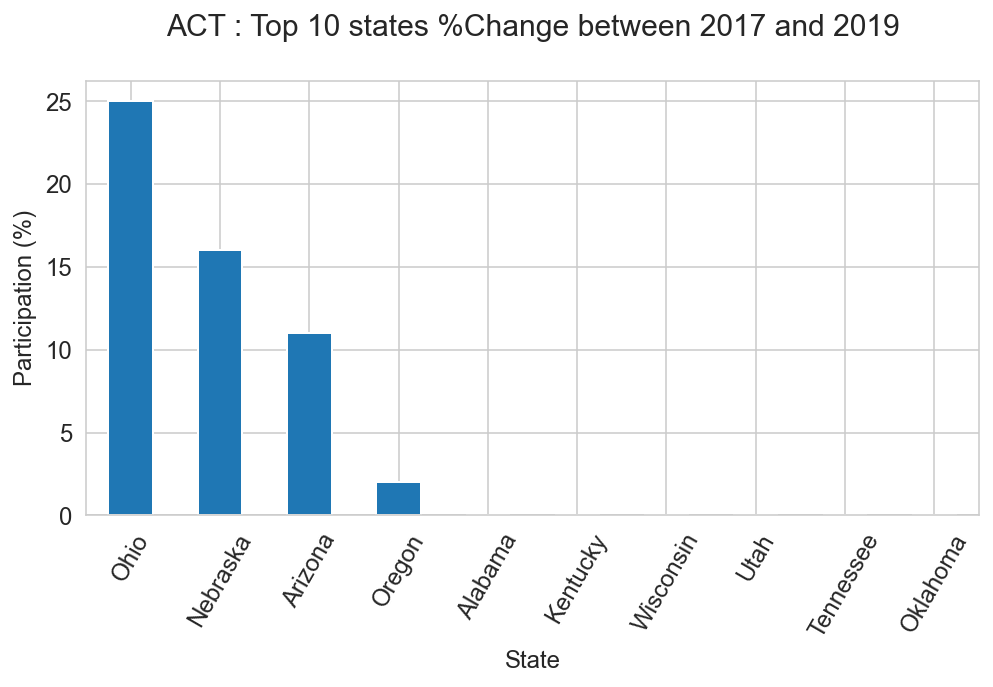

In [35]:
### Plot bar chart to visualize top10 of %Change between 2017-2019

df_top10_perchange.iloc[:10].plot(kind='bar',figsize=(8,4),fontsize=12,legend=False)
plt.xlabel('State',fontsize=12)
plt.ylabel('Participation (%)',fontsize=12)
plt.title('ACT : Top 10 states %Change between 2017 and 2019\n',fontsize=15)
plt.xticks(rotation=60);

## Visualization of score

In [36]:
df_act.head()

,participation_2017,composite_2017,participation_2018,composite_2018,participation_2019,composite_2019,%change
state,,,,,,,
Alabama,100.0,19.2,100.0,19.1,100.0,18.9,0.0
Alaska,65.0,19.8,33.0,20.8,38.0,20.1,-27.0
Arizona,62.0,19.7,66.0,19.2,73.0,19.0,11.0
Arkansas,100.0,19.4,100.0,19.4,100.0,19.3,0.0
California,31.0,22.8,27.0,22.7,23.0,22.6,-8.0


### Composite score in each year

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


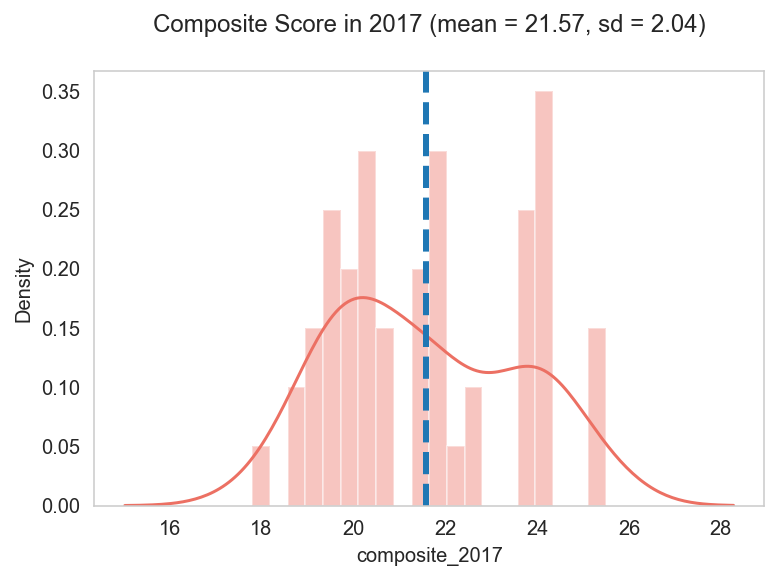

In [37]:
### Plot histogram for visualization of distribution of Composite score in 2017

mean_comp_2017 = df_act['composite_2017'].mean()
sd_comp_2017 = df_act['composite_2017'].std()
sns.distplot(df_act['composite_2017'],bins=20,color = '#EC7063')
plt.axvline(mean_comp_2017,linewidth=3,linestyle='--')
plt.title(f'Composite Score in 2017 (mean = {mean_comp_2017:.2f}, sd = {sd_comp_2017:.2f})\n')
plt.grid()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


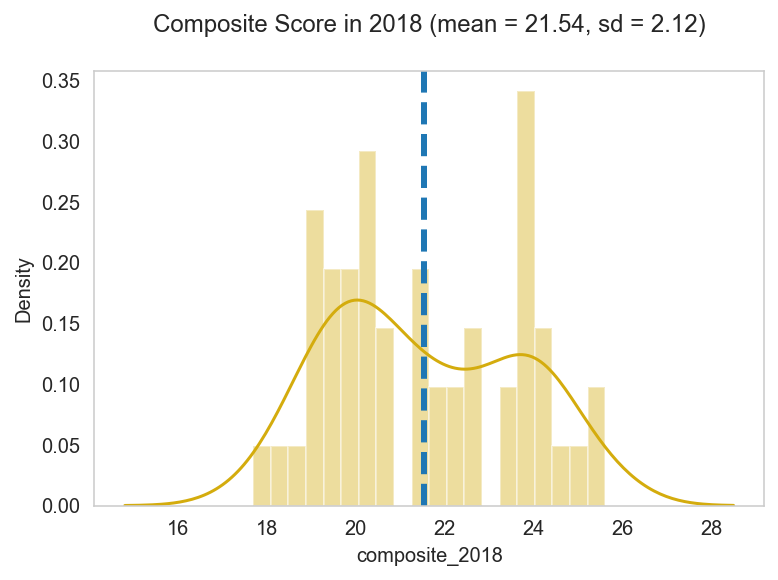

In [38]:
### Plot histogram for visualization of distribution of Composite score in 2018

mean_comp_2018 = df_act['composite_2018'].mean()
sd_comp_2018 = df_act['composite_2018'].std()
sns.distplot(df_act['composite_2018'],bins=20,color = '#D4AC0D')
plt.axvline(mean_comp_2018,linewidth=3,linestyle='--')
plt.title(f'Composite Score in 2018 (mean = {mean_comp_2018:.2f}, sd = {sd_comp_2018:.2f})\n')
plt.grid()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


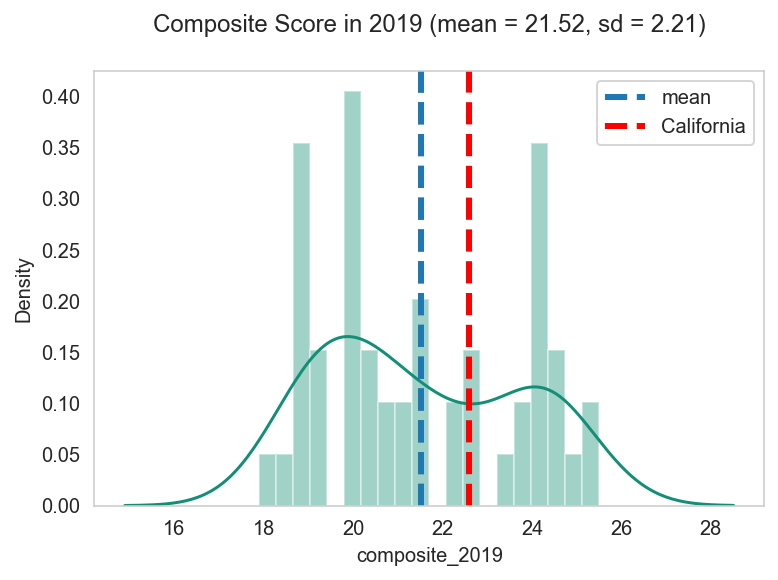

In [39]:
### Plot histogram for visualization of distribution of Composite score in 2019
### Compare with Composite mean score of all State and Composite score of California
### Show that Composite score of California lessthan Composite mean score of all State

mean_comp_2019 = df_act['composite_2019'].mean()
sd_comp_2019 = df_act['composite_2019'].std()
sns.distplot(df_act['composite_2019'],bins=20,color = '#148F77')
plt.axvline(mean_comp_2019,linewidth=3,linestyle='--')
plt.title(f'Composite Score in 2019 (mean = {mean_comp_2019:.2f}, sd = {sd_comp_2019:.2f})\n')
plt.grid()


plt.axvline(mean_comp_2019,linewidth=3,linestyle='--',label='mean')
plt.axvline(df_act.loc['California']['composite_2019'].max(),
            linewidth=3,linestyle='--',label='California',color='r')

plt.title(f'Composite Score in 2019 (mean = {mean_comp_2019:.2f}, sd = {sd_comp_2019:.2f})\n')
plt.legend()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

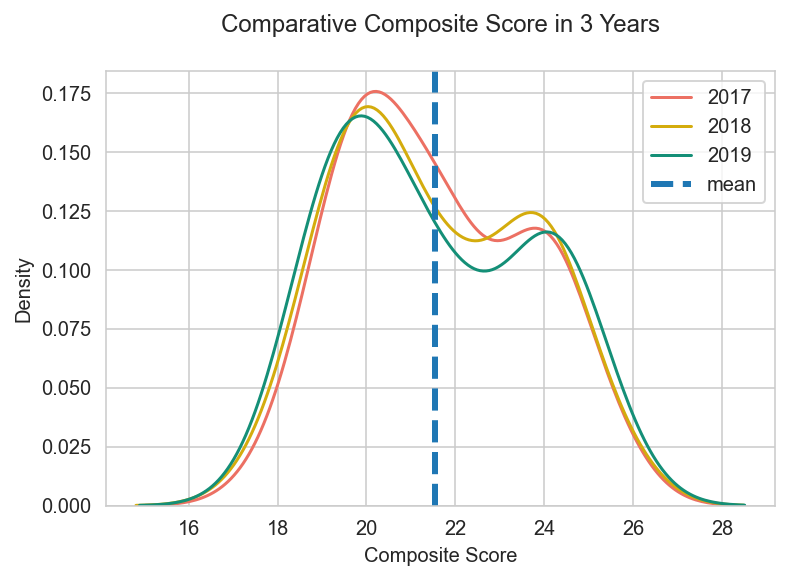

In [40]:
### Compare Composite score in 3 Years

sns.distplot(df_act['composite_2017'],bins=20,color = '#EC7063',hist=False,label='2017')
sns.distplot(df_act['composite_2018'],bins=20,color = '#D4AC0D',hist=False,label='2018')
sns.distplot(df_act['composite_2019'],bins=20,color = '#148F77',hist=False,label='2019')
plt.axvline((df_act.composite_2017.mean()+df_act.composite_2018.mean()+df_act.composite_2019.mean())/3,linewidth=3,linestyle='--',label='mean')
plt.xlabel('Composite Score')
plt.legend()
plt.title('Comparative Composite Score in 3 Years\n');

## ACT in California

In [41]:
### Filter only California to find the trend of participation

df_act_calif = df_act[['participation_2017','participation_2018','participation_2019']].loc[['California']].T
df_act_calif

state,California
participation_2017,31.0
participation_2018,27.0
participation_2019,23.0


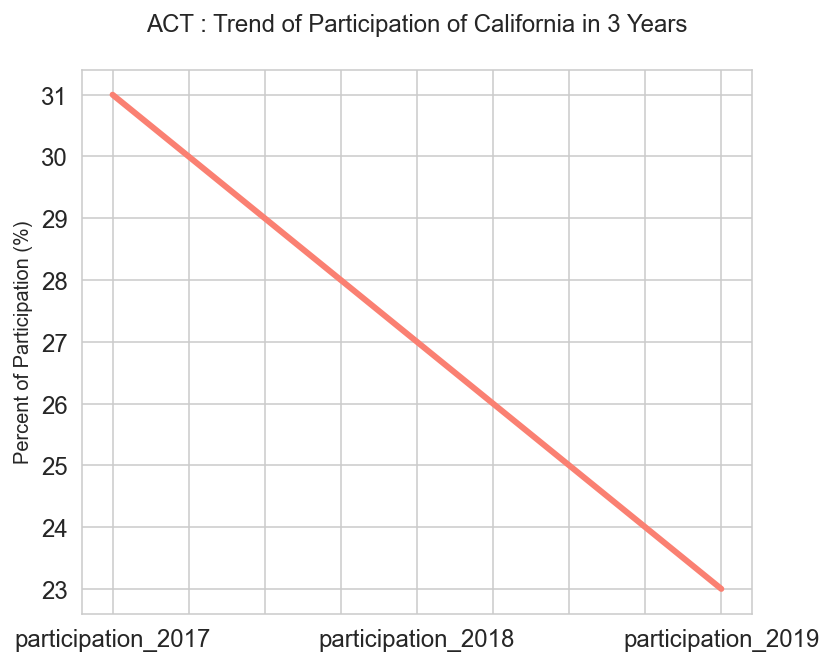

In [42]:
### Plot trend of Participation in California in 3 years

sns.set_style('whitegrid')
df_act_calif.plot(kind='line',legend=False,figsize=(6,5),lw=3,color='salmon',fontsize=12);
plt.title('ACT : Trend of Participation of California in 3 Years\n');
plt.ylabel('Percent of Participation (%)');

In [43]:
df_act_ca = pd.read_csv('data/act_2019_ca.csv')

In [44]:
df_act_ca.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


In [45]:
### Drop the unnecessary columns

df_act_ca.drop(['CDS', 'CCode', 'CDCode', 'SCode', 'DName','Year', 'Unnamed: 17'],axis=1,inplace=True)

In [46]:
df_act_ca.isnull().sum()

RType           1
SName         581
CName           1
Enroll12        1
NumTstTakr      1
AvgScrRead    357
AvgScrEng     357
AvgScrMath    357
AvgScrSci     357
NumGE21       357
PctGE21       357
dtype: int64

In [47]:
### Filter only RType = C (City name)

df_act_ca = df_act_ca[df_act_ca['RType']=='C']
df_act_ca.head()

,RType,SName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21
1064,C,NaN,Sacramento,19540.0,3065.0,21,20,21,21,1526,49.79
1065,C,NaN,San Joaquin,11778.0,1348.0,22,21,21,21,693,51.41
1066,C,NaN,Kern,14229.0,1257.0,21,20,20,20,544,43.28
1067,C,NaN,Shasta,2161.0,173.0,26,24,24,24,131,75.72
1068,C,NaN,Sutter,1827.0,196.0,23,22,22,22,117,59.69


In [48]:
### Drop the unnecessary columns

df_act_ca.drop(['RType','SName'],axis=1,inplace=True)

In [49]:
df_act_ca.shape

(58, 9)

In [50]:
### Some row has null value

df_act_ca.isnull().sum()

CName         0
Enroll12      0
NumTstTakr    0
AvgScrRead    1
AvgScrEng     1
AvgScrMath    1
AvgScrSci     1
NumGE21       1
PctGE21       1
dtype: int64

In [51]:
### Filter row that doesn't have null value

df_act_ca_update = df_act_ca[df_act_ca['NumGE21'].notnull()]
df_act_ca_update.isnull().sum()

CName         0
Enroll12      0
NumTstTakr    0
AvgScrRead    0
AvgScrEng     0
AvgScrMath    0
AvgScrSci     0
NumGE21       0
PctGE21       0
dtype: int64

In [52]:
### Reset index after delete row

df_act_ca_update.reset_index(drop=True,inplace=True)

In [53]:
df_act_ca_update[df_act_ca_update['AvgScrRead']=='*']

,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21
12,Sierra,23.0,3.0,*,*,*,*,*,*
36,Plumas,163.0,9.0,*,*,*,*,*,*
40,Del Norte,363.0,5.0,*,*,*,*,*,*


In [54]:
### Some row has '*'. I have to delete them.

print(df_act_ca_update[df_act_ca_update['AvgScrRead']=='*'].shape)

(3, 9)


In [55]:
### Filter only row that doesn't have '*'

df_act_ca_update = df_act_ca_update[df_act_ca_update['AvgScrRead']!='*']

In [56]:
### Reset index after delete row

df_act_ca_update.reset_index(drop=True,inplace=True)
df_act_ca_update.shape

(54, 9)

In [57]:
df_act_ca_update.dtypes

CName          object
Enroll12      float64
NumTstTakr    float64
AvgScrRead     object
AvgScrEng      object
AvgScrMath     object
AvgScrSci      object
NumGE21        object
PctGE21        object
dtype: object

In [58]:
df_act_ca_update.columns

Index(['CName', 'Enroll12', 'NumTstTakr', 'AvgScrRead', 'AvgScrEng',
       'AvgScrMath', 'AvgScrSci', 'NumGE21', 'PctGE21'],
      dtype='object')

In [59]:
### Convert type of percentage column to 'float'
df_act_ca_update[['PctGE21','AvgScrRead', 'AvgScrEng','AvgScrMath', 'AvgScrSci']] = df_act_ca_update[['PctGE21','AvgScrRead', 'AvgScrEng','AvgScrMath', 'AvgScrSci']].astype('float')
### Convert type of number column to 'integer'
df_act_ca_update[['Enroll12', 'NumTstTakr','NumGE21']] = df_act_ca_update[['Enroll12', 'NumTstTakr','NumGE21']].astype('int')

In [60]:
df_act_ca_update.dtypes

CName          object
Enroll12        int32
NumTstTakr      int32
AvgScrRead    float64
AvgScrEng     float64
AvgScrMath    float64
AvgScrSci     float64
NumGE21         int32
PctGE21       float64
dtype: object

In [61]:
### Set column 'CName' to index
 
df_act_ca_update.set_index('CName',inplace=True)

In [62]:
### Find the percentage of number of test takers

df_act_ca_update['Pct_TestTaker'] = (df_act_ca_update['NumTstTakr']*100)/df_act_ca_update['Enroll12']
df_act_ca_update['Pct_TestTaker'] = df_act_ca_update['Pct_TestTaker'].map(lambda x:np.round(x,2))

In [63]:
### Find the different between Enroll12 and NumTstTakr
### Different = Enroll12 - NumTstTakr

df_act_ca_update['Different'] = df_act_ca_update['Enroll12'] - df_act_ca_update['NumTstTakr']

In [64]:
df_act_ca_update.head()

,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Pct_TestTaker,Different
CName,,,,,,,,,,
Sacramento,19540,3065,21.0,20.0,21.0,21.0,1526,49.79,15.69,16475
San Joaquin,11778,1348,22.0,21.0,21.0,21.0,693,51.41,11.45,10430
Kern,14229,1257,21.0,20.0,20.0,20.0,544,43.28,8.83,12972
Shasta,2161,173,26.0,24.0,24.0,24.0,131,75.72,8.01,1988
Sutter,1827,196,23.0,22.0,22.0,22.0,117,59.69,10.73,1631


In [65]:
### Find the top 10 of percentage of test taker

df_act_top10_testtaker = df_act_ca_update[['Pct_TestTaker']].sort_values(by='Pct_TestTaker',ascending=False)[:10]
df_act_top10_testtaker

,Pct_TestTaker
CName,
Modoc,63.22
Tehama,43.90
Marin,28.45
San Francisco,24.24
Contra Costa,21.81
Placer,21.78
El Dorado,20.89
Alameda,20.66
Orange,20.62


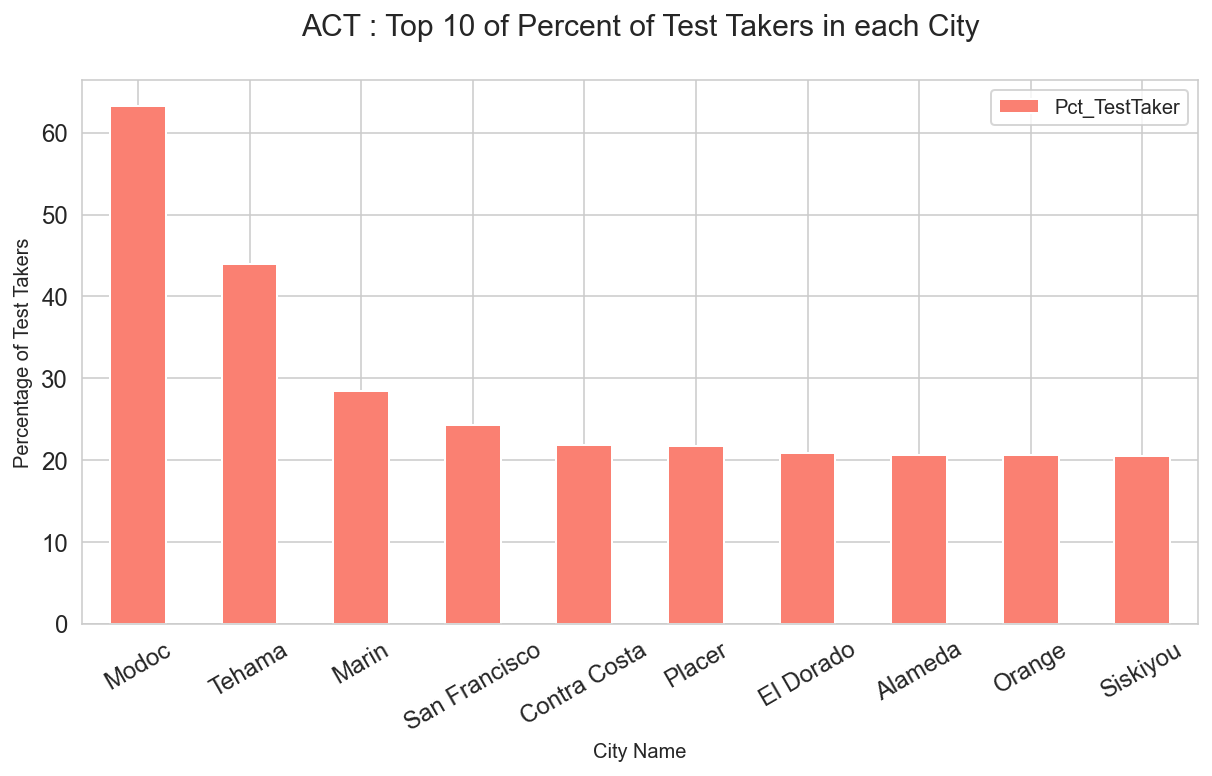

In [66]:
### Top 10 of Percent of Test Takers in each State

sns.set_style('whitegrid')
df_act_top10_testtaker.plot(kind='bar',figsize=(10,5),color='salmon',fontsize=12)
plt.title('ACT : Top 10 of Percent of Test Takers in each City\n',fontsize=15)
plt.xlabel('City Name')
plt.ylabel('Percentage of Test Takers')
plt.xticks(rotation=30);

In [67]:
### Find the top 10 of Enroll

df_act_top10_enroll = df_act_ca_update[['Enroll12','NumTstTakr','Different']].sort_values(by='Enroll12',ascending=False)[:10]
df_act_top10_enroll

,Enroll12,NumTstTakr,Different
CName,,,
Los Angeles,114618,20678,93940
San Diego,42040,8081,33959
Orange,41235,8501,32734
Riverside,34277,4767,29510
San Bernardino,31635,5418,26217
Santa Clara,21656,4228,17428
Sacramento,19540,3065,16475
Alameda,17567,3630,13937
Contra Costa,14593,3183,11410


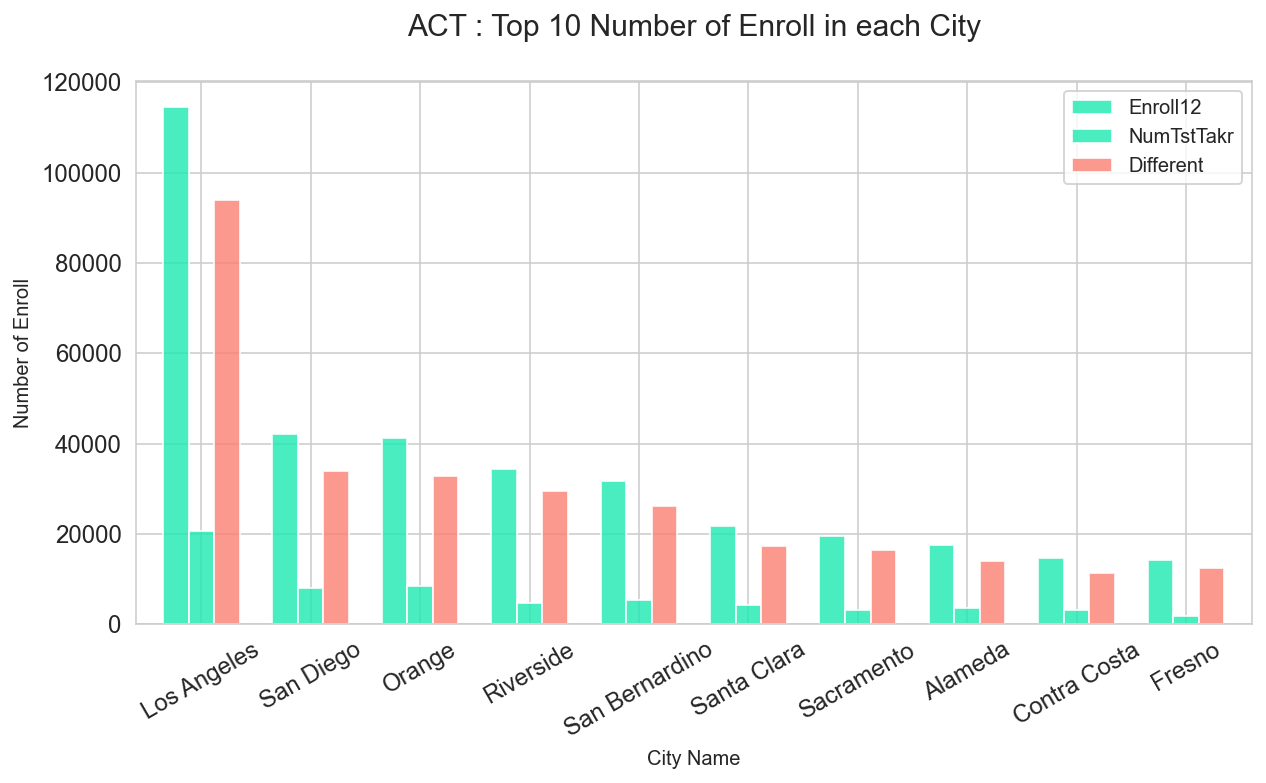

In [68]:
### Top 10 of Percent of Enroll in each State

sns.set_style('whitegrid')
df_act_top10_enroll.plot(kind='bar',figsize=(10,5),fontsize=12,width=0.7,color=['#1BE9B1','#1BE9B1','salmon'],alpha=0.8)
plt.title('ACT : Top 10 Number of Enroll in each City\n',fontsize=15)
plt.xlabel('City Name')
plt.ylabel('Number of Enroll')
plt.xticks(rotation=30);